In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
ielts_data = pd.read_csv('data/ielts_writing_dataset.csv')
print(ielts_data.shape[0])
ielts_data = ielts_data[ielts_data['Task_Type'] == 2]
print(ielts_data.shape[0])

1435
793


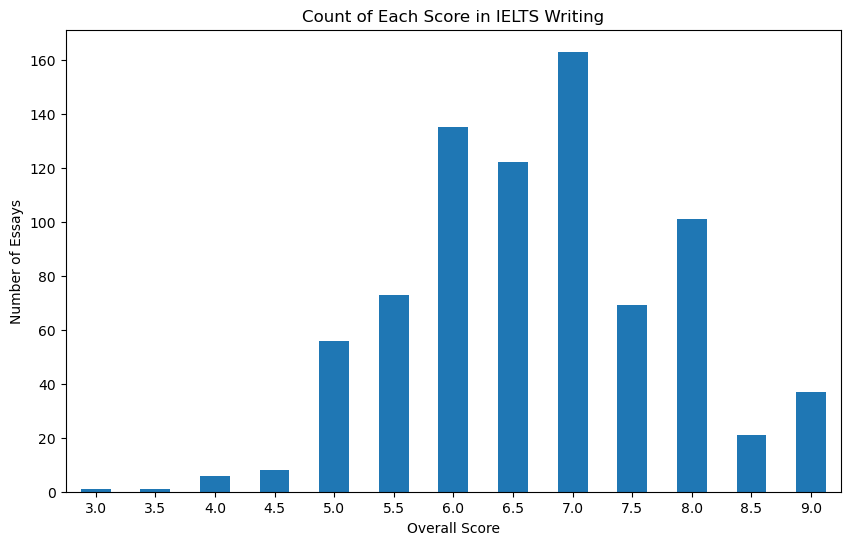

In [30]:
score_counts = ielts_data['Overall'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
score_counts.plot(kind='bar')
plt.title('Count of Each Score in IELTS Writing')
plt.xlabel('Overall Score')
plt.ylabel('Number of Essays')
plt.xticks(rotation=0)
plt.show()

In [31]:
columns_with_nan = ielts_data.columns[ielts_data.isna().any()].tolist()
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['Examiner_Commen', 'Task_Response', 'Coherence_Cohesion', 'Lexical_Resource', 'Range_Accuracy']


In [32]:
filtered_data = ielts_data[ielts_data['Examiner_Commen'].notna()]
print(filtered_data['Examiner_Commen'])

1314    The writer presented ideas and examples that a...
1323    The writer has addressed all parts of the task...
1324    All parts of the task are sufficiently address...
1325    The writer provided a complete response to the...
1326    The writer gave a thoughtful response to the t...
                              ...                        
1430    You should rewrite it, giving more thought to ...
1431    Where are the paragraphs in this essay? You mu...
1432    I suggest that you read several essays that ha...
1433    Your essay too short, the introduction is good...
1434    The structure of sentences is not very good he...
Name: Examiner_Commen, Length: 62, dtype: object


In [33]:
non_nan_count = ielts_data['Examiner_Commen'].notna().sum()
total_rows = len(ielts_data)
print(f"Number of non-NaN entries in Examiner_Commen: {non_nan_count}")
print(f"Total number of rows: {total_rows}")

Number of non-NaN entries in Examiner_Commen: 62
Total number of rows: 793


In [34]:
columns_with_nan = ielts_data.columns[ielts_data.isna().any()].tolist()
for column in columns_with_nan:
    non_nan_count = ielts_data[column].notna().sum()
    total_rows = len(ielts_data)
    print(f"{column}: Non-NaN Count = {non_nan_count}, Total Rows = {total_rows}")

Examiner_Commen: Non-NaN Count = 62, Total Rows = 793
Task_Response: Non-NaN Count = 0, Total Rows = 793
Coherence_Cohesion: Non-NaN Count = 0, Total Rows = 793
Lexical_Resource: Non-NaN Count = 0, Total Rows = 793
Range_Accuracy: Non-NaN Count = 0, Total Rows = 793


In [35]:
ielts_data.columns

Index(['Task_Type', 'Question', 'Essay', 'Examiner_Commen', 'Task_Response',
       'Coherence_Cohesion', 'Lexical_Resource', 'Range_Accuracy', 'Overall'],
      dtype='object')

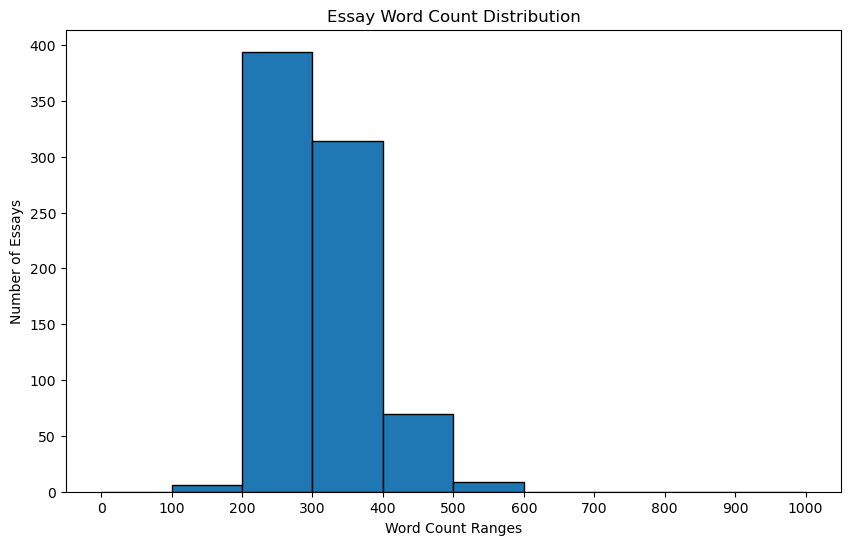

In [36]:
ielts_data['word_count'] = ielts_data['Essay'].apply(lambda x: len(x.split()))
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
plt.figure(figsize=(10, 6))
plt.hist(ielts_data['word_count'], bins=bins, edgecolor='black')
plt.title('Essay Word Count Distribution')
plt.xlabel('Word Count Ranges')
plt.ylabel('Number of Essays')
plt.xticks(bins)
plt.show()